# Driver D2 - analysis of tripMD outputs

## 1. Imports and data loading

In [1]:
freq_per_second = 5
output_name="D2_driver"

lat_index=0
lon_index=1

In [2]:
import os
import sys
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

FILE_DIR = os.getcwd()
ROOT_DIR = os.path.abspath(os.path.join(FILE_DIR, os.pardir))
sys.path.insert(0, os.path.join(ROOT_DIR, "src"))

from tripMD.cluster import plot_dtwsom_bmus
from utils import uah_eval, uah_viz

In [3]:
output_folder = os.path.join(ROOT_DIR, "outputs", output_name)

trip_list = pickle.load(open(os.path.join(output_folder, "trip_list.p"), "rb"))
motif_list = pickle.load(open(os.path.join(output_folder, "motifs.p"), "rb"))
pruned_motif_list = pickle.load(open(os.path.join(output_folder, "pruned_motifs.p"), "rb"))
dtwsom_model = pickle.load(open(os.path.join(output_folder, "dtwsom_model.p"), "rb"))
cluster_dict_list = pickle.load(open(os.path.join(output_folder, "dtwsom_clusters.p"), "rb"))
clusters_sum = pickle.load(open(os.path.join(output_folder, "clusters_summary.p"), "rb"))

motif_center_list = [motif.get_center_obs(trip_list) for motif in motif_list]

## 2. DTW-SOM plots

<img src="../../outputs/D2_driver/umatrix_plot.png" alt="drawing" width="400"/><img src="../../outputs/D2_driver/winner_plot.png" alt="drawing" width="400"/>

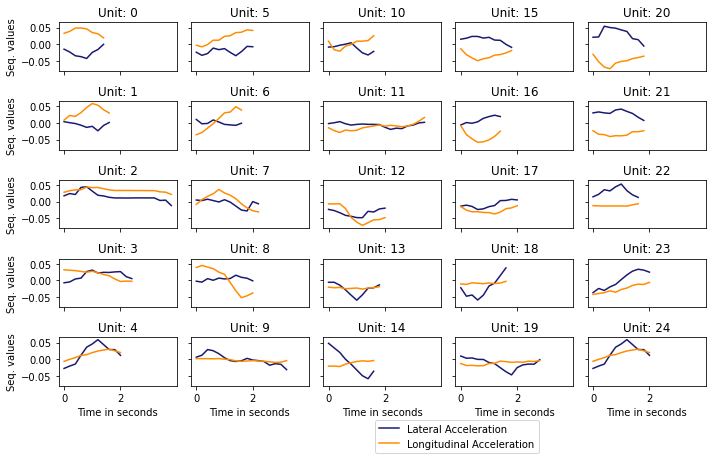

In [4]:
fig = plot_dtwsom_bmus(dtwsom_model, lat_index, lon_index, freq_per_second)
plt.show()

## 3. Cluster analysis

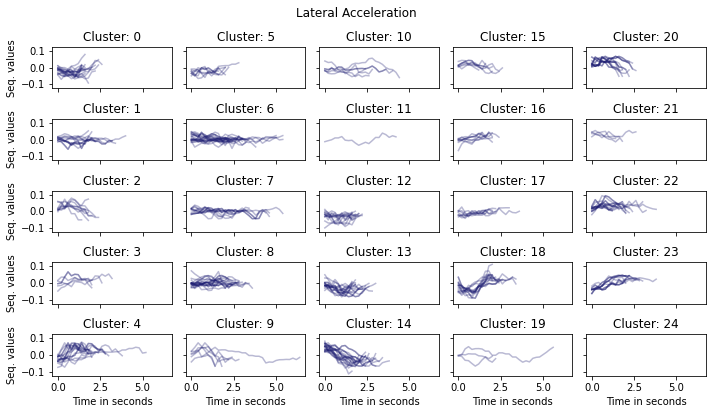

In [5]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, 
                                         lat_index, color="midnightblue", suptitle="Lateral Acceleration")
plt.show()

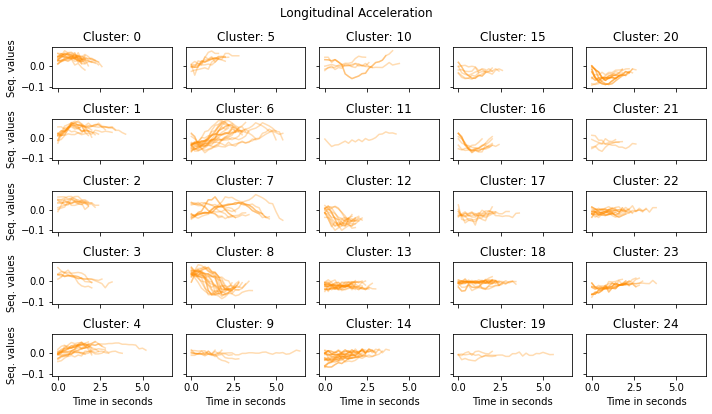

In [6]:
fig = uah_viz.plot_clusters_acceleration(dtwsom_model, motif_center_list, freq_per_second, 
                                         lon_index, color="darkorange", suptitle="Longitudinal Acceleration")
plt.show()

In [7]:
clusters_sum

[{'n_members': 17,
  'lat_maneuvers': [('neg_turn', 0.588),
   ('high_neg_turn', 0.353),
   ('neg_turn-pos_turn', 0.059)],
  'lon_maneuvers': [('accel', 0.529), ('strong_accel', 0.471)]},
 {'n_members': 13,
  'lat_maneuvers': [('neg_turn', 0.538),
   ('no_man', 0.308),
   ('pos_turn', 0.154)],
  'lon_maneuvers': [('strong_accel', 0.846),
   ('accel', 0.077),
   ('accel-accel', 0.077)]},
 {'n_members': 9,
  'lat_maneuvers': [('high_pos_turn', 0.556), ('pos_turn', 0.444)],
  'lon_maneuvers': [('accel', 0.667), ('strong_accel', 0.333)]},
 {'n_members': 6,
  'lat_maneuvers': [('high_pos_turn', 0.5), ('pos_turn', 0.5)],
  'lon_maneuvers': [('accel', 1.0)]},
 {'n_members': 17,
  'lat_maneuvers': [('high_pos_turn', 0.588),
   ('neg_turn-pos_turn', 0.176),
   ('pos_turn', 0.176),
   ('neg_turn-high_pos_turn', 0.059)],
  'lon_maneuvers': [('accel', 0.765), ('no_man', 0.235)]},
 {'n_members': 8,
  'lat_maneuvers': [('neg_turn', 0.75),
   ('high_neg_turn', 0.125),
   ('neg_turn-neg_turn', 0.125)]

## 4. Prunned motifs

In [8]:
len(pruned_motif_list)

17

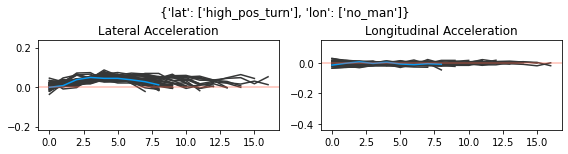

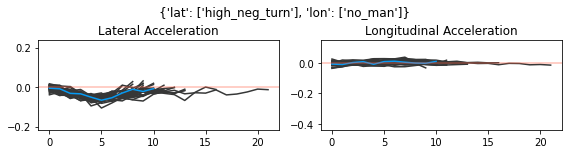

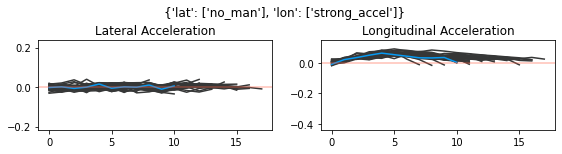

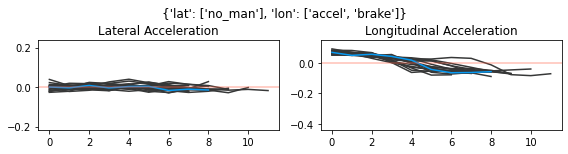

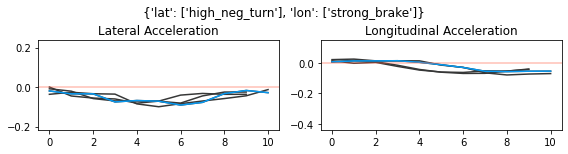

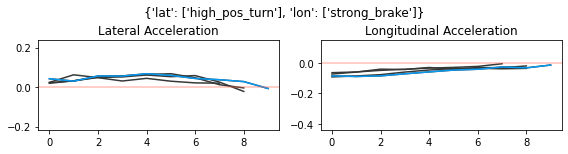

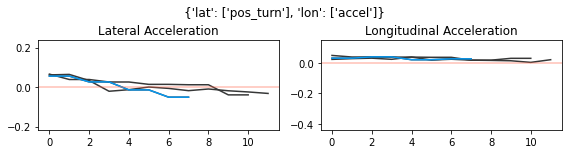

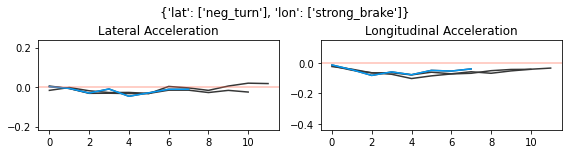

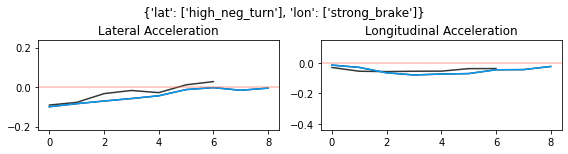

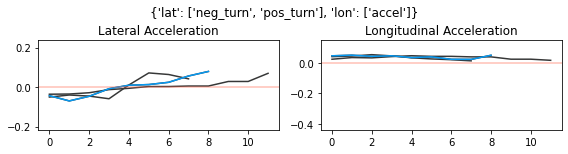

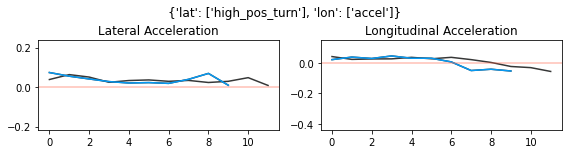

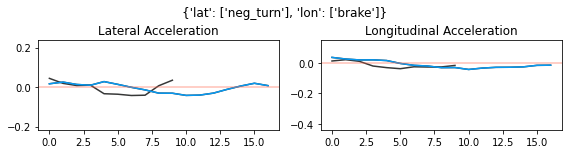

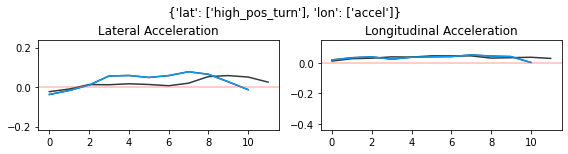

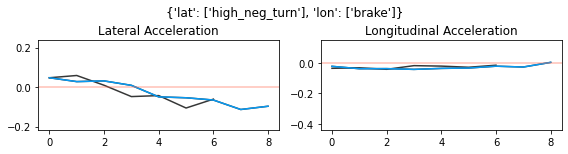

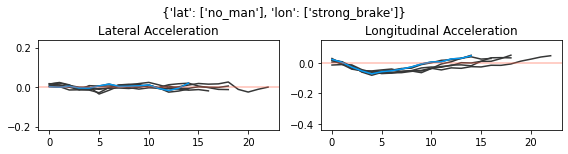

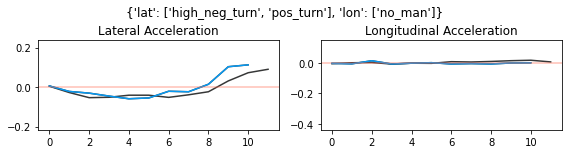

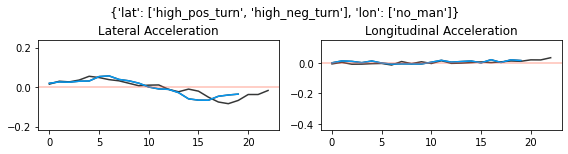

In [9]:
for motif in pruned_motif_list:
    uah_viz.plot_motif_members(motif, trip_list, lon_index, lat_index, True)
    plt.tight_layout()
    plt.show()